Do related immune lineages cluster together based on their ATAC-seq chromatin accessibility?


c:\Users\janna\miniconda3\envs\data_analysis\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


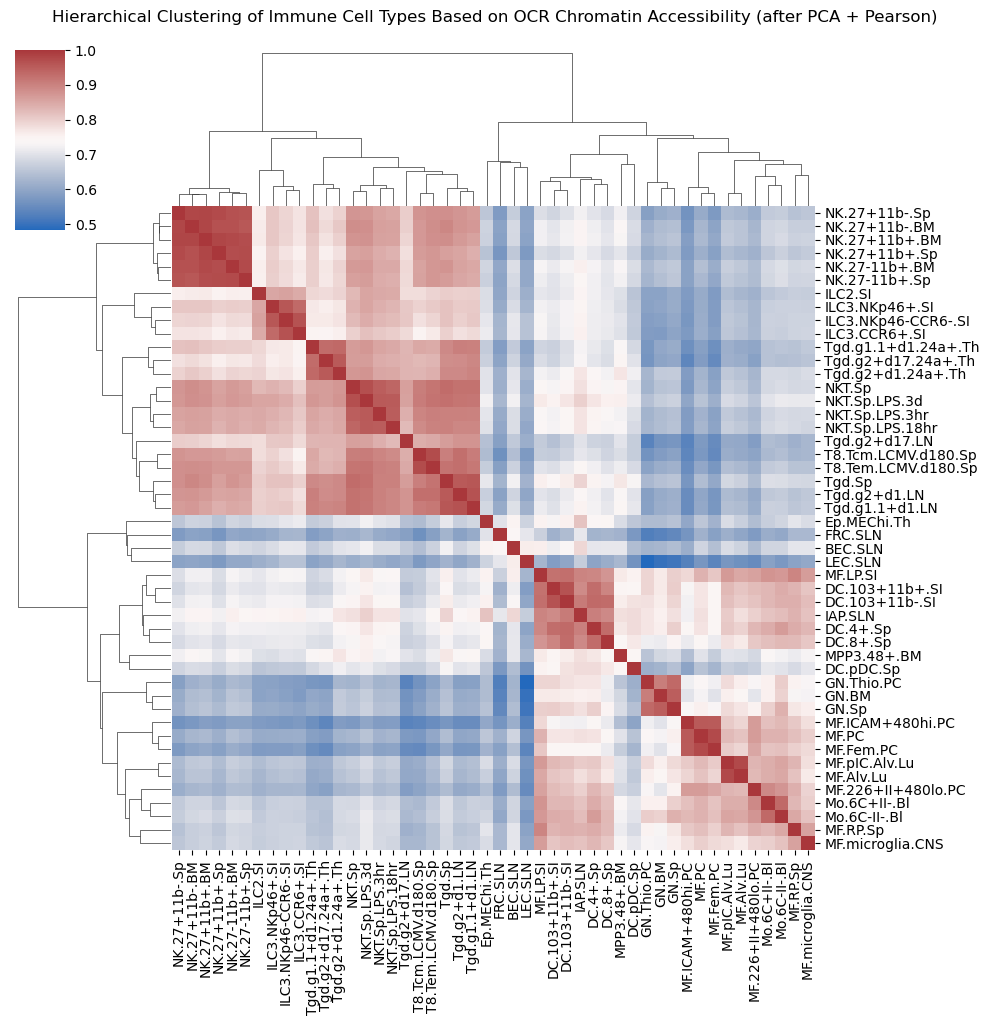

c:\Users\janna\miniconda3\envs\data_analysis\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


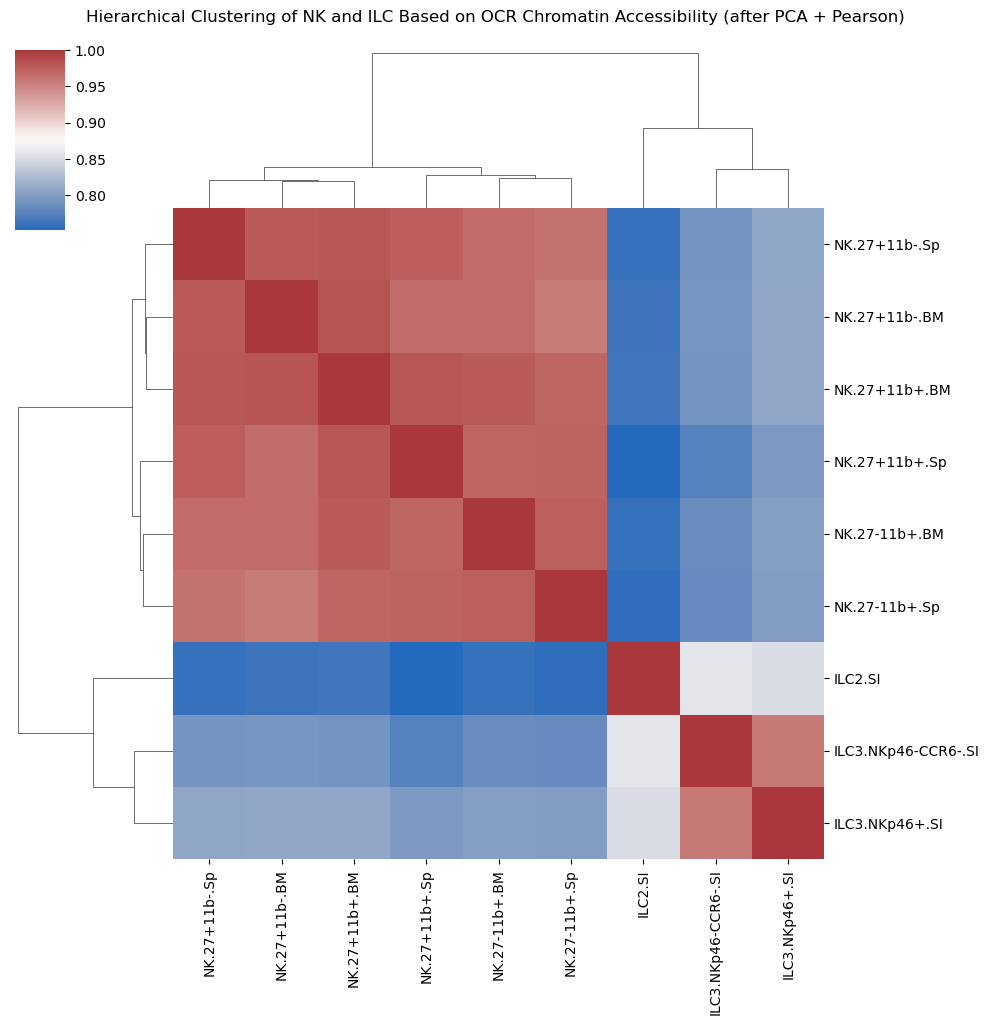

In [ ]:

print("Do related immune lineages cluster together based on their ATAC-seq chromatin accessibility?")
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df_raw = pd.read_csv("data/ImmGenATAC18_AllOCRsInfo.csv", header=0, quotechar='"', low_memory=False)

# Extract only the cell type columns (from column 50 onward)
df_expr = df_raw.iloc[:, 50:]  # Python uses 0-based indexing

# Transpose to have cell types as rows and OCRs as columns
df_expr = df_expr.T
df_expr.index.name = "Celltype"

# PCA with 25 components
#pca = PCA(n_components=25)
#pca_result = pca.fit_transform(df_expr)

#kmeans clustering
from sklearn.cluster import KMeans
k = 25
kmeans = KMeans(n_clusters=k, random_state=42)
df_expr['Cluster'] = kmeans.fit_predict(df_expr)

# Pearson correlation across immune cell types
corr_matrix = np.corrcoef(df_expr)

# Hierarchical clustering using Ward's linkage
linkage_matrix = linkage(pdist(df_expr, metric='euclidean'), method='ward')

# Plot heatmap with clustering
sns.clustermap(corr_matrix, row_linkage=linkage_matrix, col_linkage=linkage_matrix,
               cmap="vlag", figsize=(10, 10), xticklabels=df_expr.index, yticklabels=df_expr.index)
plt.suptitle("Hierarchical Clustering of Immune Cell Types Based on OCR Chromatin Accessibility (after PCA + Pearson)", y=1.02)
plt.show()

#Now the same but only with NK and ILC
# Extract only ILC and NK coulumns
df_expr_NK_ILC = df_raw.iloc[:, 63:72]  
#Transpose
df_expr_NK_ILC= df_expr_NK_ILC.T
df_expr_NK_ILC.index.name = "Celltype"

#kmeans clustering
k = 9
kmeans = KMeans(n_clusters=k, random_state=42)
df_expr_NK_ILC['Cluster'] = kmeans.fit_predict(df_expr_NK_ILC)

# PCA with 9 components
#pca2 = PCA(n_components=9)
#pca2_result = pca2.fit_transform(df_expr_NK_ILC)

# Pearson correlation across immune cell types
corr_matrix2 = np.corrcoef(df_expr_NK_ILC)

# Hierarchical clustering using Ward's linkage
linkage_matrix2 = linkage(pdist(df_expr_NK_ILC, metric='euclidean'), method='ward')

# Plot heatmap with clustering
sns.clustermap(corr_matrix2, row_linkage=linkage_matrix2, col_linkage=linkage_matrix2,
               cmap="vlag", figsize=(10, 10), xticklabels=df_expr_NK_ILC.index, yticklabels=df_expr_NK_ILC.index)
plt.suptitle("Hierarchical Clustering of NK and ILC Based on OCR Chromatin Accessibility (after PCA + Pearson)", y=1.02)
plt.show()